In [29]:
import numpy as np

from copy import deepcopy
from tqdm import tqdm

from Mixers import * 

import matplotlib.pyplot as plt

---

##### Parameters

In [43]:
n    = 100    # side length of the box

time = 3000   # number of iterations
step = 10     # how often do we save a picture

wait = 10     # time spent between pictures given in ms
dpi  = 200    # defines the quality of the figure, something like pixels per inch

density_init     = 1e-3           # initial density
transition_class = LazyRandomWalk # transition strategy

##### Global settings

In [30]:
np.set_printoptions(precision=2)
plt.rcParams['figure.dpi'] = dpi

---

##### Setting the initial distribution

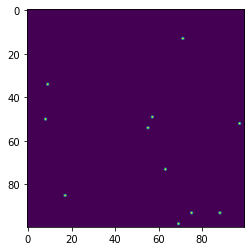

In [47]:
di = (np.random.rand(n,n) < density_init).astype(float)
init = Distribution(di)

# printing so you have aesthetic options
plt.imshow(init.dist)
plt.show()

##### Simulation & gif

Every figure is closed asap to save resources.

In [29]:
distribution = deepcopy(init)    # we want the same init for every strategy
transition = transition_class(n)

folder_name = f'.{str(transition)}_n{n}_t{time}_s{step}'
!mkdir $folder_name

# we save extra images of the init, so it will be visible in the gif
plt.figure(dpi=dpi)
plt.imshow(distribution.dist)
[plt.savefig(f'{folder_name}/{str(transition)}_0000_{j}.png', ) for j in range(4)]
plt.close()

# main iteration
for i in tqdm(np.arange(step,time,step), ncols=50):
    # advancing
    [distribution.update(transition) for _ in range(step)]

    # saving the current state
    plt.figure(dpi=dpi)
    plt.imshow(distribution.dist)
    plt.savefig(f'{folder_name}/{str(transition)}_{i:04}.png')
    plt.close()

pics = f'{folder_name}/*.png'
gif = f'gifs/{folder_name}.gif'
!convert -delay 10 -loop 0 $pics $gif

100%|███████████| 299/299 [01:23<00:00,  3.59it/s]


---
---
---